### Loading the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
sns.set(color_codes=True)
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

### Loading the dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Visualizing the clusters

In [3]:
wardlink = linkage(df, method = 'ward')

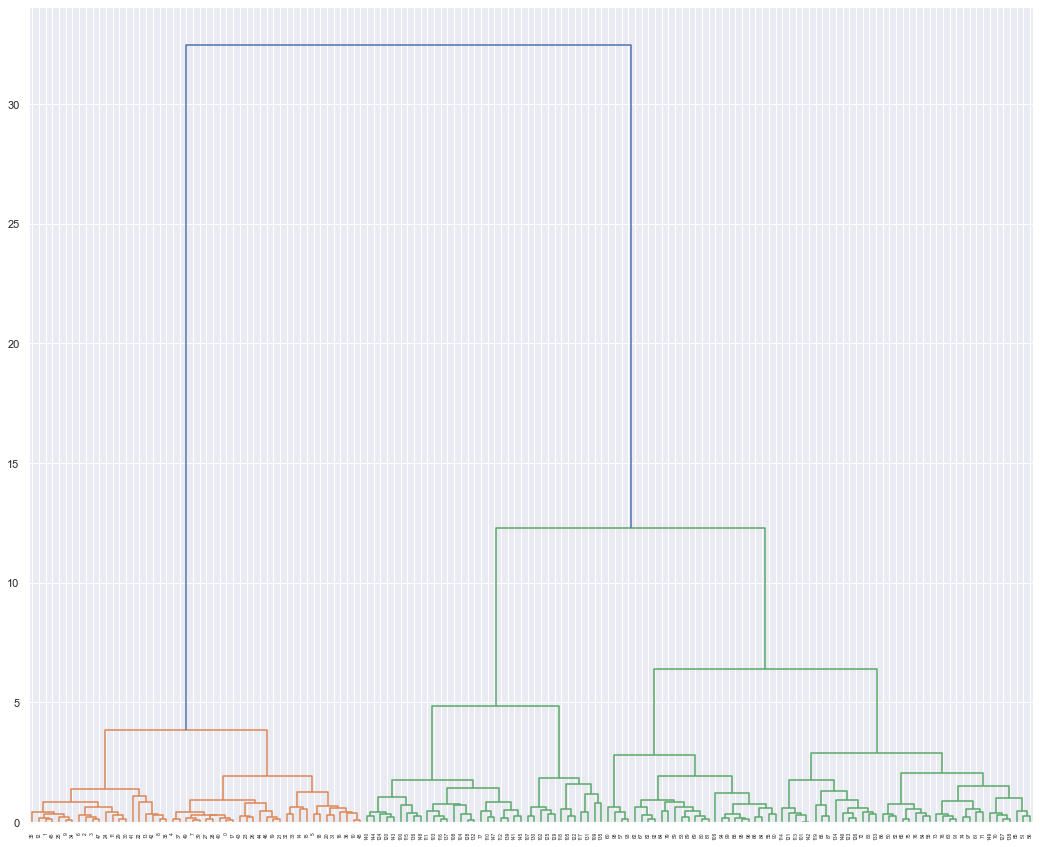

In [4]:
plt.figure(figsize=(18,15))
dend = dendrogram(wardlink)

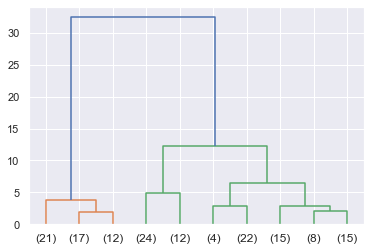

In [5]:
dend = dendrogram(wardlink, truncate_mode = 'lastp', p = 10)

### Use of KMeans for looking at the optimum clusters

In [6]:
x = df.iloc[:, [0, 1, 2, 3]].values

wss = []

for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit (x)
    wss.append(k_means.inertia_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


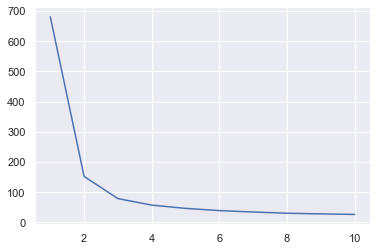

In [7]:
plt.plot(range(1,11),wss)

The graph clearly shows the **optimum number of clusters are 3** as the graph abruptly falls from 1 to 2 and 2 to 3, but after that it gets almost straight.

In [8]:
k_means = KMeans(n_clusters=3)
k_means.fit(x)
k_means.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [9]:
k_means.inertia_

78.851441426146

#### END - Your comments would matter